# Load Visium Data

In [36]:
import scanpy as sc
import squidpy as sq
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import os


#load data
data_path = os.path.join('..', 'data', 'raw')
spatial_path = os.path.join(data_path, 'Parent_Visium_Human_Glioblastoma_spatial')

adata = sc.read_visium(path=spatial_path)

adata.var_names_make_unique()


/tmp/ipykernel_65537/133465085.py:13: FutureWarning: Use `squidpy.read.visium` instead.
  adata = sc.read_visium(path=spatial_path)
/usr/local/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


# Basic Preprocessing

In [37]:
#basic QC metrics
sc.pp.calculate_qc_metrics(adata, inplace=True)

#filter cells and genes with optional thresholds
sc.pp.filter_cells(adata, min_genes=200) #at least 200 genes per cell
sc.pp.filter_genes(adata, min_cells=3) #expressed genes show up in at least 2 cells

#normalize and log-transform
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

#identify highly variable genes
sc.pp.highly_variable_genes(adata, flavor='seurat', n_top_genes=2000)
adata = adata[:, adata.var.highly_variable]



# Dimensionality Reduction

In [38]:
import tqdm

#scale data
sc.pp.scale(adata, max_value=10)

#PCA
sc.tl.pca(adata, svd_solver='arpack')

#neighborhood graph
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)

#umap embedding
sc.tl.umap(adata)

/usr/local/lib/python3.10/site-packages/scanpy/preprocessing/_scale.py:309: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/local/lib/python3.10/functools.py:889: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


# Clustering

In [48]:
#cluster
sc.tl.leiden(adata=adata, resolution=1)

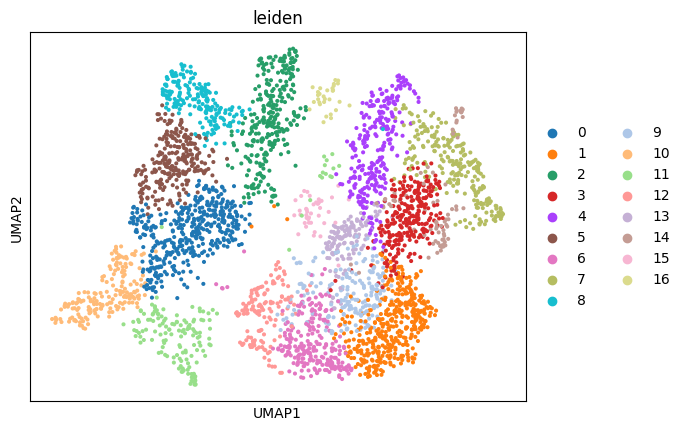

In [49]:
#umap with clusters
sc.pl.umap(adata, color=['leiden'])

/tmp/ipykernel_65537/2041650318.py:1: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata, color=['leiden'], spot_size=75)


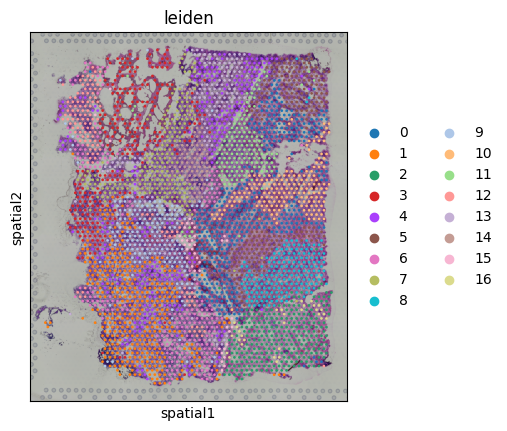

In [60]:
sc.pl.spatial(adata, color=['leiden'], spot_size=75)

/tmp/ipykernel_65537/265240848.py:1: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata, color='leiden', spot_size=75)


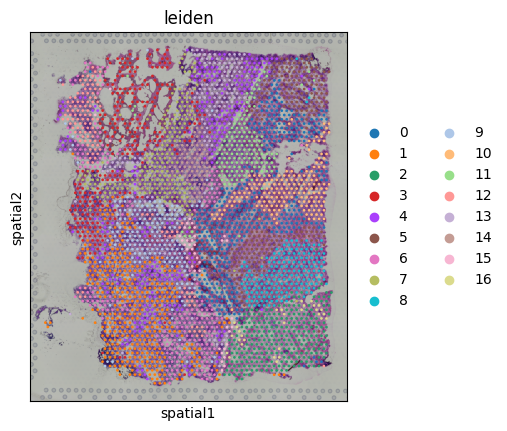

In [64]:
sc.pl.spatial(adata, color='leiden', spot_size=75)

['8', '3', '6', '0', '1', ..., '14', '15', '13', '11', '12']
Length: 17
Categories (17, object): ['0', '1', '2', '3', ..., '13', '14', '15', '16']
